# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mission 1
## 승객과 승무원중 생존율이 더 높은 직군

In [2]:
file_path = "C:/Users/besto/kgt_ai/programmers_kdt_II/titanic"

titanic_df = pd.read_csv(file_path + "/train.csv")

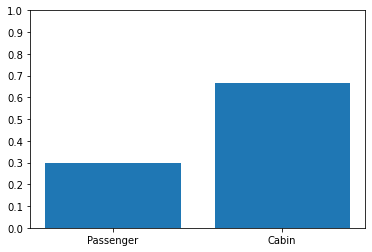

In [3]:
passenger_df = titanic_df[titanic_df['Cabin'].isnull()]
cabin_df = titanic_df[titanic_df['Cabin'].notnull()]
mean = [passenger_df['Survived'].mean(), cabin_df['Survived'].mean()]

plt.bar(['Passenger', 'Cabin'],mean)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

승객보다 **승무원** 이 평균적으로 더 높은 생존율을 보였다.

--- 

# Mission 2
## 다이아몬드의 가격과 다른 요소들의 상관 관계
`https://www.kaggle.com/shivam2503/diamonds`

In [85]:
file_path = "C:/Users/besto/kgt_ai/programmers_kdt_II/archive/"

dia_df = pd.read_csv(file_path + "/diamonds.csv")

In [5]:
dia_df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
dia_df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


- carat <-> price => carat up == price up
- cut <-> price => cut is good == price up
- color <-> price => color is unique == price up

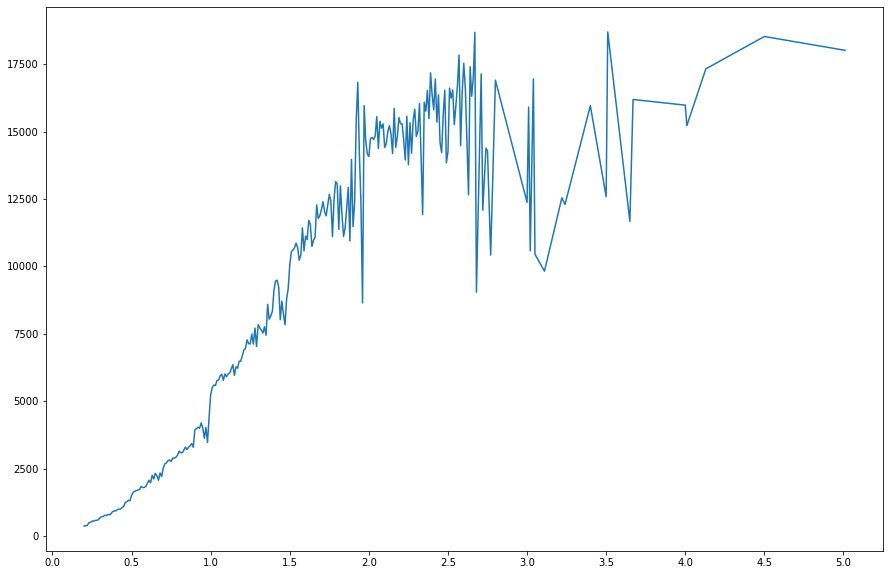

In [39]:
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(dia_df[['carat', 'price']].groupby('carat').mean())
plt.xticks(np.arange(0, 5.1, 0.5))
plt.show()

In [133]:
print(dia_df['cut'].unique())
print(dia_df['color'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


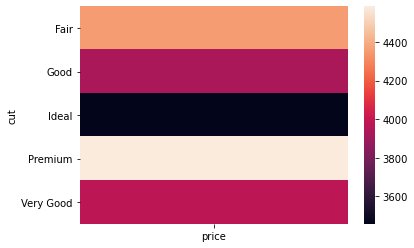

In [128]:
sns.heatmap(dia_df[['price', 'cut']].groupby('cut').mean())
plt.show()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


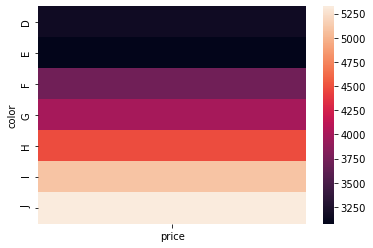

In [181]:
print(dia_df['color'].value_counts())
sns.heatmap(dia_df[['price', 'color']].groupby('color').mean())
plt.show()

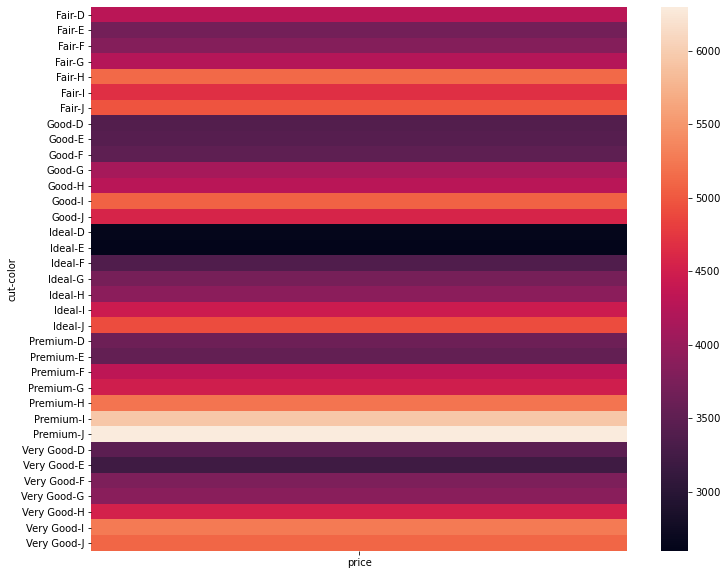

In [179]:
plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(dia_df[['cut', 'color', 'price']].groupby(['cut', 'color']).mean())
plt.show()

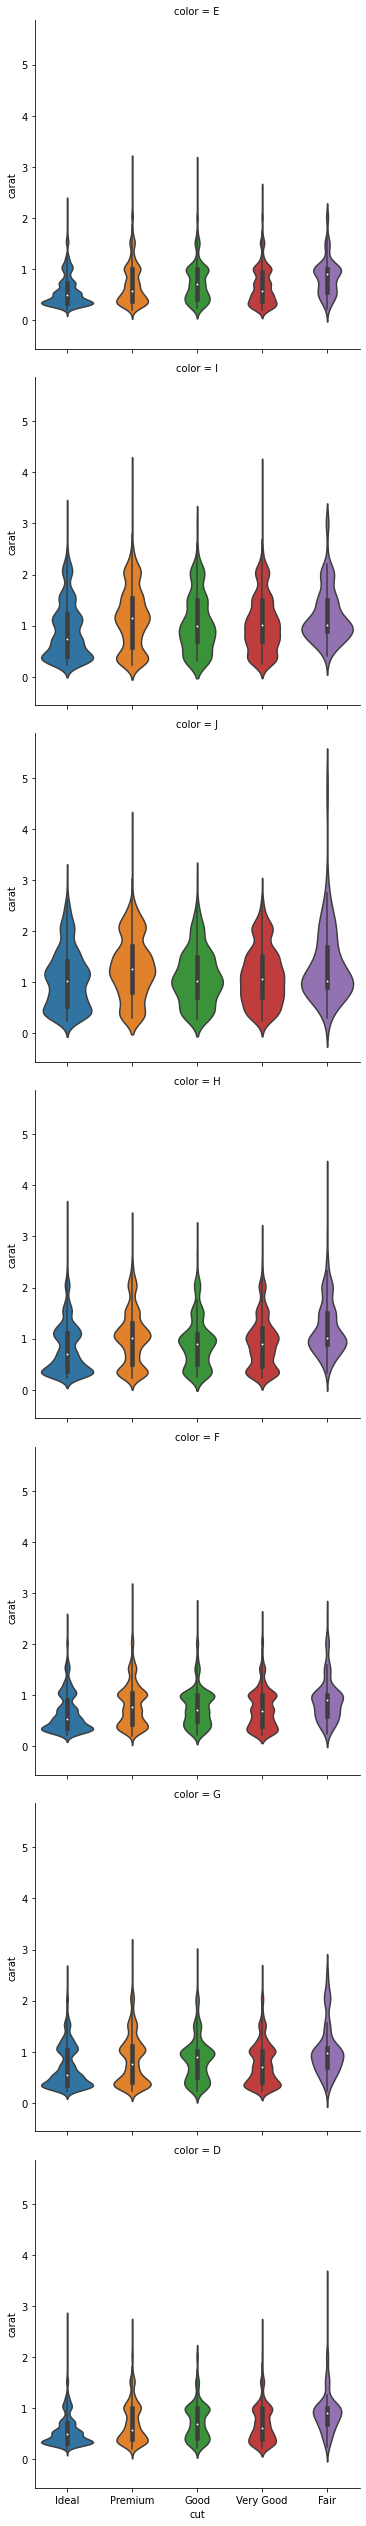

In [189]:
sns.catplot(x='cut', y = 'carat', col = 'color', data = dia_df, kind = 'violin', col_wrap = 1)

plt.show()

In [217]:
dia_df.groupby(['cut', 'color']).mean()[['carat','price']]

carat        price
cut       color                       
Fair      D      0.920123  4291.061350
          E      0.856607  3682.312500
          F      0.904712  3827.003205
          G      1.023822  4239.254777
          H      1.219175  5135.683168
          I      1.198057  4685.445714
          J      1.341176  4975.655462
Good      D      0.744517  3405.382175
          E      0.745134  3423.644159
          F      0.775930  3495.750275
          G      0.850896  4123.482204
          H      0.914729  4276.254986
          I      1.057222  5078.532567
          J      1.099544  4574.172638
Ideal     D      0.565766  2629.094566
          E      0.578401  2597.550090
          F      0.655829  3374.939362
          G      0.700715  3720.706388
          H      0.799525  3889.334831
          I      0.913029  4451.970377
          J      1.063594  4918.186384
Premium   D      0.721547  3631.292576
          E      0.717745  3538.914420
          F      0.827036  4324.890176
          G      0.841488  4500.742134
          H      1.016449  5216.706780
          I      1.144937  5946.180672
          J      1.293094  6294.591584
Very Good D      0.696424  3470.467284
          E      0.676317  3214.652083
          F      0.740961  3778.820240
          G      0.766799  3872.753806
          H      0.915948  4535.390351
          I      1.046952  5255.879568
          J      1.133215  5103.513274

In [214]:
dia_df.groupby('cut').count()

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


## EDA 전
- 캐럿이 클 수록 가격이 비쌀 것이다.
- 가공 상태가 좋을수록 가격이 비쌀 것이다.
- 색이 희귀할 수록 가격이 비쌀 것이다.
 
## EDA 후
1. 캐럿 - 가격
 - 대부분의 다이아 몬드가 캐럿이 커짐에 따라 가격 또한 비싸졌다.
2. 가공 상태 - 가격
 - 상태는 총 5가지 ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']순으로 좋은것 
 - **Ideal**을 제외한 상태들은 상태가 좋을 수록 높은 가격대가 형성
 - Ideal이 가장 좋은 상태임에도 낮은 평균을 가지는 것은 가치가 없는 **D, E**88등급의 개수가 비교적 많아서 그런것 같다.
 - Ideal이 가장 물량이 많아 가장 좋은 색인 **J, I**에의 캐럿 평균이 낮은편이기에 가격 또한 같이 낮아진것 같다.
3. 색 - 가격
 - 색은 총 7가지 [ J > D ]순으로 좋은것
 - 예상과 일치하는 결과    